In [578]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import os
import sys
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### Below charts 2019 results off 2015-2018 season data

In [579]:
os.chdir('/Users/ahelgeso/Documents/GitHub/bball-master/Stat Sheets')

In [580]:
np.set_printoptions(threshold=sys.maxsize)

In [581]:
db19 = pd.read_csv('2019stats.csv')
db15 = pd.read_csv('2015stats.csv')
db16 = pd.read_csv('2016stats.csv')
db17 = pd.read_csv('2017stats.csv')
db18 = pd.read_csv('2018stats.csv')

db = pd.concat([db15, db16, db17, db18])

In [582]:
Cols = ['Result','Location','Rolling3EFG', 'Rolling3TOV', 'Rolling3ORB',
       'Rolling3FTR', 'Rolling3Pace', 'Rolling3OEff', 'Rolling3DEff',
       'Opp R3EFG', 'Opp R3TOV', 'Opp R3ORB', 'Opp R3FTR', 'Opp R3Pace',
       'Opp R3 OEff', 'Opp R3 DEff', 'Rolling5EFG', 'Rolling5TOV',
       'Rolling5ORB', 'Rolling5FTR', 'Rolling5Pace', 'Rolling5OEff',
       'Rolling5DEff', 'Opp R5EFG', 'Opp R5TOV', 'Opp R5ORB', 'Opp R5FTR',
       'Opp R5Pace', 'Opp R5 OEff', 'Opp R5 DEff', 'Rolling7EFG',
       'Rolling7TOV', 'Rolling7ORB', 'Rolling7FTR', 'Rolling7Pace',
       'Rolling7OEff', 'Rolling7DEff', 'Opp R7EFG', 'Opp R7TOV', 'Opp R7ORB',
       'Opp R7FTR', 'Opp R7Pace', 'Opp R7 OEff', 'Opp R7 DEff', 
        'Odds', 'Line', 'Cover']

feature3Cols = ['Location','Rolling3EFG', 'Rolling3TOV', 'Rolling3ORB', 'Rolling3FTR', 
                'Rolling3Pace', 'Rolling3OEff', 'Rolling3DEff', 'Opp R3EFG', 
                'Opp R3TOV', 'Opp R3ORB', 'Opp R3FTR', 'Opp R3Pace', 'Opp R3 OEff', 'Opp R3 DEff']

feature5Cols = ['Location','Rolling5EFG', 'Rolling5TOV', 'Rolling5ORB', 'Rolling5FTR', 
                'Rolling5Pace', 'Rolling5OEff','Rolling5DEff', 'Opp R5EFG', 
                'Opp R5TOV', 'Opp R5ORB', 'Opp R5FTR', 'Opp R5Pace', 'Opp R5 OEff', 'Opp R5 DEff']

feature7Cols = ['Location','Rolling7EFG', 'Rolling7TOV', 'Rolling7ORB', 'Rolling7FTR', 
                'Rolling7Pace', 'Rolling7OEff', 'Rolling7DEff', 'Opp R7EFG', 
                'Opp R7TOV', 'Opp R7ORB', 'Opp R7FTR', 'Opp R7Pace', 'Opp R7 OEff', 'Opp R7 DEff']

allFeatureCols = ['Location','Rolling3EFG', 'Rolling3TOV', 'Rolling3ORB', 'Rolling3FTR', 
                'Rolling3Pace', 'Rolling3OEff', 'Rolling3DEff', 'Opp R3EFG', 
                'Opp R3TOV', 'Opp R3ORB', 'Opp R3FTR', 'Opp R3Pace', 'Opp R3 OEff', 'Opp R3 DEff',
                 'Rolling5EFG', 'Rolling5TOV', 'Rolling5ORB', 'Rolling5FTR', 
                'Rolling5Pace', 'Rolling5OEff','Rolling5DEff', 'Opp R5EFG', 
                'Opp R5TOV', 'Opp R5ORB', 'Opp R5FTR', 'Opp R5Pace', 'Opp R5 OEff', 'Opp R5 DEff',
                 'Rolling7EFG', 'Rolling7TOV', 'Rolling7ORB', 'Rolling7FTR', 
                'Rolling7Pace', 'Rolling7OEff', 'Rolling7DEff', 'Opp R7EFG', 
                'Opp R7TOV', 'Opp R7ORB', 'Opp R7FTR', 'Opp R7Pace', 'Opp R7 OEff', 'Opp R7 DEff']

db = db[Cols]

In [583]:
cols = ['Rolling3Pace', 'Rolling3OEff', 'Rolling3DEff', 'Opp R3Pace', 'Opp R3 OEff', 'Opp R3 DEff',
        'Rolling5Pace', 'Rolling5OEff','Rolling5DEff','Opp R5Pace', 'Opp R5 OEff', 'Opp R5 DEff',
       'Rolling7Pace', 'Rolling7OEff', 'Rolling7DEff','Opp R7Pace', 'Opp R7 OEff', 'Opp R7 DEff']

for col in cols:
    db[col] = db[col]/100.0
    
for col in cols:
    db19[col] = db19[col]/100.0

In [584]:
X = db.dropna()[allFeatureCols]
y = db.dropna()['Result']

In [585]:
db19 = db19.dropna().reset_index(drop = True)[Cols]

In [586]:
dogs2019 = db19[db19['Line'] > 0].reset_index(drop = True)

In [587]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [588]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(dogs2019[allFeatureCols])
    acc = accuracy_score(dogs2019['Result'], train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    print('Confusion Matrix\n',confusion_matrix(dogs2019['Result'], train_predictions))
    
    train_predictions = clf.predict_proba(dogs2019[allFeatureCols])
    ll = log_loss(dogs2019['Result'], train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 57.6117%
Confusion Matrix
 [[479 254]
 [211 153]]
Log Loss: 4.638800619808923


/Users/ahelgeso/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
****Results****
Accuracy: 33.1814%
Confusion Matrix
 [[  0 733]
 [  0 364]]
Log Loss: 0.7005599550252252


/Users/ahelgeso/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC
****Results****
Accuracy: 59.2525%
Confusion Matrix
 [[504 229]
 [218 146]]
Log Loss: 0.6914760498133532
DecisionTreeClassifier
****Results****
Accuracy: 55.3327%
Confusion Matrix
 [[443 290]
 [200 164]]
Log Loss: 15.427530021427746


/Users/ahelgeso/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 60.6199%
Confusion Matrix
 [[546 187]
 [245 119]]
Log Loss: 0.7959153748714098
AdaBoostClassifier
****Results****
Accuracy: 62.0784%
Confusion Matrix
 [[565 168]
 [248 116]]
Log Loss: 0.6907132264207602
GradientBoostingClassifier
****Results****
Accuracy: 62.6253%
Confusion Matrix
 [[579 154]
 [256 108]]
Log Loss: 0.6520676669964389
GaussianNB
****Results****
Accuracy: 60.8933%
Confusion Matrix
 [[545 188]
 [241 123]]
Log Loss: 0.9190866311038515
LinearDiscriminantAnalysis
****Results****
Accuracy: 64.3573%
Confusion Matrix
 [[598 135]
 [256 108]]
Log Loss: 0.6370714957247454
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 61.6226%
Confusion Matrix
 [[530 203]
 [218 146]]
Log Loss: 0.7047659469028322


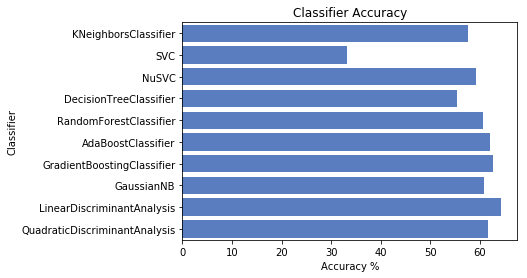

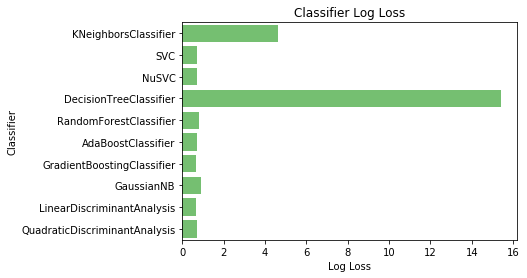

In [589]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [590]:
preds_avg = []

for i in range(100):
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lda = LinearDiscriminantAnalysis().fit(x_train, y_train)

    pred = lda.predict(dogs2019[allFeatureCols])
    
    preds_avg.append(pred)
                           
    if i%10 == 0:
        print("Model #:", i)
        
preds = [sum(i) for i in zip(*preds_avg)]


Model #: 0
Model #: 10
Model #: 20
Model #: 30
Model #: 40
Model #: 50
Model #: 60
Model #: 70
Model #: 80
Model #: 90


For staggered win predictions:
ML wins: 117 ML losses: 135 Spread wins: 138 Spread losses: 110 pushes: 0 profit: 1723.0 total risk: 25200 ROI: 0.06837301587301588



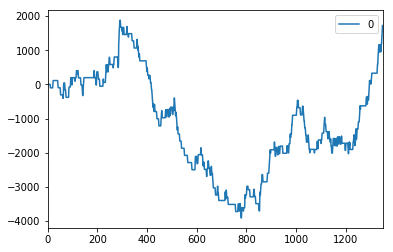

In [591]:
### Betting Spread and ML ###

odds = []
MLwins = []
MLlosses = []
spreadwins = []
spreadlosses = []
push = []
profit = []
t1 = 50
t2 = 66
t3 = 87

for i, n in enumerate(preds):
    ## 87% confidence, 3U bet for spread/ML#######
#     if n >= t3 and dogs2019['Result'][i] == 1:
#         MLwins.append(1)
#         spreadwins.append(1)
#         profit.append(3 * dogs2019['Odds'][i]) # ML Win
#         profit.append(300)                     # Spread Win
#         odds.append(dogs2019['Odds'][i])
        
#     elif n >= t3 and dogs2019['Result'][i] == 0:
#         MLlosses.append(1)
#         profit.append(-300)
#         odds.append(dogs2019['Odds'][i])
        
#         if dogs2019['Cover'][i] == 1:
#             profit.append(300)
#             spreadwins.append(1)
#         elif dogs2019['Cover'][i] == -1:
#             profit.append(-330)
#             spreadlosses.append(1)
#         else:
#             profit.append(0)
#             push.append(1)
    
#     ###### 66% confidence, 2U bet#######
#     elif n >= t2 and dogs2019['Result'][i] == 1:
#         MLwins.append(1)
#         spreadwins.append(1)
#         profit.append(2 * dogs2019['Odds'][i])
#         profit.append(200)
#         odds.append(dogs2019['Odds'][i])
        
#     elif n >= t2 and dogs2019['Result'][i] == 0:
#         MLlosses.append(1)
#         profit.append(-200)
#         odds.append(dogs2019['Odds'][i])
        
#         if dogs2019['Cover'][i] == 1:
#             profit.append(200)
#             spreadwins.append(1)
#         elif dogs2019['Cover'][i] == -1:
#             profit.append(-220)
#             spreadlosses.append(1)
#         else:
#             profit.append(0)
    
    ####### 50% confidence, 1U bet #######
    if n >= t1 and dogs2019['Result'][i] == 1:
        MLwins.append(1)
        profit.append(dogs2019['Odds'][i])
        odds.append(dogs2019['Odds'][i])
        
        if dogs2019['Cover'][i] == 1:
            profit.append(100)
            spreadwins.append(1)
        elif dogs2019['Cover'][i] == -1:
            profit.append(-110)
            spreadlosses.append(1)
        else:
            profit.append(0)
        
    elif n >= t1 and dogs2019['Result'][i] == 0:
        MLlosses.append(1)
        profit.append(-100)
        odds.append(dogs2019['Odds'][i])
        
        if dogs2019['Cover'][i] == 1:
            profit.append(100)
            spreadwins.append(1)
        elif dogs2019['Cover'][i] == -1:
            profit.append(-110)
            spreadlosses.append(1)
        else:
            profit.append(0)
            
    else:
        profit.append(0)
        
avg_odds = statistics.mean(odds)
profits = sum(profit)
total_bet = 100 * (len(MLwins) + len(MLlosses))
ROI = profits/total_bet
#winpct = len(wins)/(len(wins)+len(losses))

print('For staggered win predictions:')
print('ML wins:', len(MLwins), 'ML losses:', len(MLlosses),'Spread wins:', len(spreadwins), 'Spread losses:', len(spreadlosses), 
      'pushes:', len(push), 'profit:', profits, 'total risk:', total_bet, 'ROI:', ROI)
print('')
pd.DataFrame(profit).cumsum().plot()

For ML win predictions:
ML wins: 117 ML losses: 135 profit: 3767.0 total risk: 25200 ROI: 0.149484126984127 avg odds: 128.69444444444446



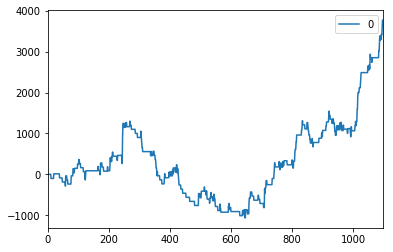

In [593]:
### Betting Only ML ###

odds = []
MLwins = []
MLlosses = []
profit = []

for i, n in enumerate(preds):
    ####### 50% confidence, 1U bet #######
    if n >= t1 and dogs2019['Result'][i] == 1:
        MLwins.append(1)
        profit.append(abs(dogs2019['Odds'][i]))
        odds.append(dogs2019['Odds'][i])
        
    elif n >= t1 and dogs2019['Result'][i] == 0:
        MLlosses.append(1)
        
        profit.append(-100)
        odds.append(dogs2019['Odds'][i])
            
    else:
        profit.append(0)
        
avg_odds = statistics.mean(odds)
profits = sum(profit)
total_bet = 100 * (len(MLwins) + len(MLlosses))
ROI = profits/total_bet
#winpct = len(wins)/(len(wins)+len(losses))

print('For ML win predictions:')
print('ML wins:', len(MLwins), 'ML losses:', len(MLlosses),
      'profit:', profits, 'total risk:', total_bet, 'ROI:', ROI, 'avg odds:', avg_odds)
print('')
pd.DataFrame(profit).cumsum().plot()

In [569]:
pd.concat([dogs2019, pd.DataFrame(preds)], axis = 1)

,Result,Location,Rolling3EFG,Rolling3TOV,Rolling3ORB,Rolling3FTR,Rolling3Pace,Rolling3OEff,Rolling3DEff,Opp R3EFG,...,Opp R7TOV,Opp R7ORB,Opp R7FTR,Opp R7Pace,Opp R7 OEff,Opp R7 DEff,Odds,Line,Cover,0
0,0,1,0.528000,0.109667,0.298000,0.248667,97.566667,117.800000,117.666667,0.511333,...,0.116571,0.268429,0.226000,100.214286,111.071429,103.671429,195.0,6.0,-1.0,0
1,0,0,0.506000,0.122667,0.343000,0.272333,94.900000,116.500000,121.166667,0.509333,...,0.099857,0.234857,0.215000,99.000000,115.500000,113.485714,380.0,9.5,-1.0,0
2,0,0,0.502000,0.120333,0.219333,0.252333,96.566667,110.000000,121.333333,0.498000,...,0.104714,0.216000,0.148571,98.628571,105.300000,113.714286,130.0,3.5,1.0,0
3,0,1,0.503000,0.142667,0.195333,0.163333,93.066667,102.166667,121.133333,0.554667,...,0.117143,0.254714,0.222714,105.257143,112.171429,106.585714,210.0,6.5,-1.0,0
4,0,0,0.496667,0.156667,0.176333,0.132333,96.766667,96.566667,111.366667,0.458333,...,0.133571,0.187143,0.192000,97.985714,102.771429,107.257143,185.0,5.5,1.0,0
5,1,1,0.489667,0.149667,0.256333,0.118667,96.033333,98.733333,102.833333,0.531667,...,0.114714,0.231857,0.203429,100.742857,114.642857,106.200000,220.0,6.5,1.0,0
6,0,0,0.500000,0.149667,0.305667,0.124667,96.200000,103.066667,98.100000,0.566000,...,0.137143,0.210857,0.246571,97.928571,110.171429,115.285714,700.0,12.0,-1.0,28
7,0,0,0.520000,0.161333,0.297333,0.174333,98.233333,104.233333,103.833333,0.512667,...,0.127000,0.247571,0.198143,102.242857,104.442857,104.700000,400.0,10.0,-1.0,0
8,0,1,0.527000,0.154333,0.269333,0.231667,96.733333,107.433333,110.800000,0.529000,...,0.126714,0.258429,0.185000,101.171429,110.971429,108.214286,360.0,9.0,1.0,0
9,1,0,0.473667,0.105333,0.234333,0.238000,96.600000,104.800000,117.933333,0.500667,...,0.142429,0.243429,0.259000,100.528571,112.228571,110.314286,925.0,13.5,1.0,0


For spread win predictions:
Spread wins: 139 Spread losses: 108 pushes: 4 win pct: 0.562753036437247 profit: 2020 total risk: 25100 ROI: 0.0804780876494024



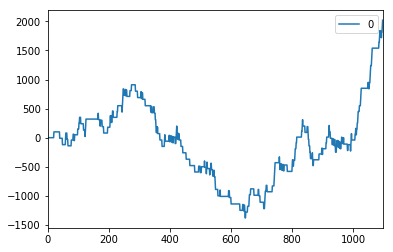

In [567]:
### Betting Only Spread ###

spreadwins = []
spreadlosses = []
push = []
profit = []

for i, n in enumerate(preds):

    ####### 50% confidence, 1U bet #######
    if n >= t1 and dogs2019['Cover'][i] == 1:
        spreadwins.append(1)
        profit.append(100)                     # Spread Win

    elif n >= t1 and dogs2019['Cover'][i] == -1:
        profit.append(-110)
        spreadlosses.append(1)
        
    elif n >= t1 and dogs2019['Cover'][i] == 0:
            profit.append(0)
            push.append(1)
            
    else:
        profit.append(0)
        
profits = sum(profit)
spreadtotal_bet = 100 * (len(spreadwins) + len(spreadlosses)+len(push))
ROI = profits/total_bet
spreadwinpct = len(spreadwins)/(len(spreadwins)+len(spreadlosses))

print('For spread win predictions:')
print('Spread wins:', len(spreadwins), 'Spread losses:', len(spreadlosses), 
      'pushes:', len(push),"win pct:", spreadwinpct, 'profit:', profits, 'total risk:', spreadtotal_bet, 'ROI:', ROI)
print('')
pd.DataFrame(profit).cumsum().plot()

In [452]:
db19.head()

,Result,Location,Rolling3EFG,Rolling3TOV,Rolling3ORB,Rolling3FTR,Rolling3Pace,Rolling3OEff,Rolling3DEff,Opp R3EFG,...,Opp R7EFG,Opp R7TOV,Opp R7ORB,Opp R7FTR,Opp R7Pace,Opp R7 OEff,Opp R7 DEff,Odds,Line,Cover
0,0,1,0.528000,0.109667,0.298000,0.248667,97.566667,117.800000,117.666667,0.511333,...,0.504429,0.116571,0.268429,0.226000,100.214286,111.071429,103.671429,195.0,6.0,-1.0
1,0,0,0.506000,0.122667,0.343000,0.272333,94.900000,116.500000,121.166667,0.509333,...,0.523286,0.099857,0.234857,0.215000,99.000000,115.500000,113.485714,380.0,9.5,-1.0
2,0,0,0.502000,0.120333,0.219333,0.252333,96.566667,110.000000,121.333333,0.498000,...,0.492286,0.104714,0.216000,0.148571,98.628571,105.300000,113.714286,130.0,3.5,1.0
3,0,1,0.503000,0.142667,0.195333,0.163333,93.066667,102.166667,121.133333,0.554667,...,0.526714,0.117143,0.254714,0.222714,105.257143,112.171429,106.585714,210.0,6.5,-1.0
4,0,0,0.496667,0.156667,0.176333,0.132333,96.766667,96.566667,111.366667,0.458333,...,0.497857,0.133571,0.187143,0.192000,97.985714,102.771429,107.257143,185.0,5.5,1.0


### Below charts 2018 results off 2016-2017 data (for comparison)

In [233]:
db19 = pd.read_csv('2019stats.csv')
db15 = pd.read_csv('2015stats.csv')
db16 = pd.read_csv('2016stats.csv')
db17 = pd.read_csv('2017stats.csv')
db18 = pd.read_csv('2018stats.csv')

db = pd.concat([db15, db16, db17])

db18['Date'] = db18['Date'].apply(str)
db18['Date'] = pd.to_datetime(db18.Date, format = "%Y%m%d")
db18 = db18.sort_values(by = ['Date']).reset_index(drop = True)

/Users/ahelgeso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [237]:
Cols = ['Result','Rolling3EFG','Rolling3TOV','Rolling3ORB','Rolling3FTR','Rolling3Pace','Opp R3Pace',
        'Opp R3EFG','Opp R3TOV','Opp R3ORB','Opp R3FTR', 'Rolling3DEff', 'Opp R3 Deff', 'Rolling3OEff','Opp R3 Oeff',
       'Rolling9EFG','Rolling9TOV','Rolling9ORB','Rolling9FTR','Rolling9Pace','Opp R9Pace',
        'Opp R9EFG','Opp R9TOV','Opp R9ORB','Opp R9FTR', 'Rolling9DEff', 'Opp R9 Deff', 'Rolling9OEff','Opp R9 Oeff']

feature3Cols = ['Rolling3EFG','Rolling3TOV','Rolling3ORB','Rolling3FTR','Rolling3Pace','Opp R3Pace',
                'Opp R3EFG','Opp R3TOV','Opp R3ORB','Opp R3FTR', 'Rolling3DEff', 'Opp R3 Deff', 'Rolling3OEff','Opp R3 Oeff']
feature9Cols = ['Rolling9EFG','Rolling9TOV','Rolling9ORB','Rolling9FTR','Rolling9Pace','Opp R9Pace',
                'Opp R9EFG','Opp R9TOV','Opp R9ORB','Opp R9FTR', 'Rolling9DEff', 'Opp R9 Deff', 'Rolling9OEff','Opp R9 Oeff']


db = db[Cols]

In [196]:
feature3Cols = ['Rolling3EFG','Rolling3TOV','Rolling3ORB','Rolling3FTR','Rolling3Pace','Opp R3Pace','Opp R3EFG','Opp R3TOV','Opp R3ORB','Opp R3FTR', 'Rolling3DEff', 'Opp R3 Deff', 'Rolling3OEff','Opp R3 Oeff']
target = ['Result']

X3 = db.dropna()[feature3Cols]
y = np.array(db.dropna()[target]).flatten()

x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3)

dogs2019 = db18[(db18['Line'] > 0)].dropna().reset_index()
Ydogs2019 = db18[(db18['Line'] > 0)].dropna()['Result']

In [197]:
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2)
ada3 = AdaBoostClassifier(n_estimators=100, learning_rate=0.1).fit(x3_train, y3_train)
pred = ada3.predict(x3_test)
print('Dog picks:',ada3.score(dogs2019[feature3Cols], Ydogs2019))
print('All picks (R3) matrix:\n',confusion_matrix(y3_test, pred))


Dog picks: 0.6555246053853296
All picks (R3) matrix:
 [[288 195]
 [180 285]]


In [198]:
preds_avg = []
probs_avg = []

for i in range(100):
    x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2)
    ada3 = AdaBoostClassifier(n_estimators=50, learning_rate=0.1).fit(x3_train, y3_train)

    x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2)
    gbc3 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth = 1).fit(x3_train, y3_train)

    x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2)
    eclf1 = VotingClassifier(estimators=[('ada', ada3), ('gbc', gbc3)], voting='soft')
    eclf1 = eclf1.fit(x3_train, y3_train)
    pred = eclf1.predict(dogs2019[feature3Cols])
    
    preds_avg.append(pred)
    if i%10 == 0:
        print("Model #:", i)
        
preds = [sum(i) for i in zip(*preds_avg)]



Model #: 0
Model #: 10
Model #: 20
Model #: 30
Model #: 40
Model #: 50
Model #: 60
Model #: 70
Model #: 80
Model #: 90


For staggered win predictions:
ML wins: 123 ML losses: 189 Spread wins: 154 Spread losses: 149 pushes: 4 profit: -6874 total risk: 31200 ROI: -0.22032051282051282



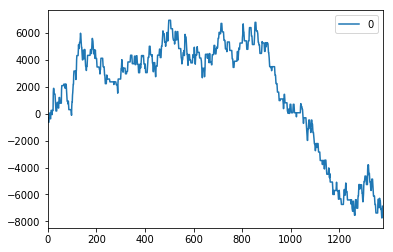

In [199]:
### Betting Spread and ML ###

odds = []
MLwins = []
MLlosses = []
spreadwins = []
spreadlosses = []
push = []
profit = []
t3 = 90
t2 = 70
t1 = 50

for i, n in enumerate(preds):
    ## 87% confidence, 3U bet for spread/ML#######
    if n >= t3 and dogs2019['Result'][i] == 1:
        MLwins.append(1)
        spreadwins.append(1)
        profit.append(3 * dogs2019['Odds'][i]) # ML Win
        profit.append(300)                     # Spread Win
        odds.append(dogs2019['Odds'][i])
        
    elif n >= t3 and dogs2019['Result'][i] == 0:
        MLlosses.append(1)
        profit.append(-300)
        odds.append(dogs2019['Odds'][i])
        
        if dogs2019['Cover'][i] == 1:
            profit.append(300)
            spreadwins.append(1)
        elif dogs2019['Cover'][i] == -1:
            profit.append(-330)
            spreadlosses.append(1)
        else:
            profit.append(0)
            push.append(1)
    
    ###### 66% confidence, 2U bet#######
    elif n >= t2 and dogs2019['Result'][i] == 1:
        MLwins.append(1)
        spreadwins.append(1)
        profit.append(2 * dogs2019['Odds'][i])
        profit.append(200)
        odds.append(dogs2019['Odds'][i])
        
    elif n >= t2 and dogs2019['Result'][i] == 0:
        MLlosses.append(1)
        profit.append(-200)
        odds.append(dogs2019['Odds'][i])
        
        if dogs2019['Cover'][i] == 1:
            profit.append(200)
            spreadwins.append(1)
        elif dogs2019['Cover'][i] == -1:
            profit.append(-220)
            spreadlosses.append(1)
        else:
            profit.append(0)
    
    ####### 50% confidence, 1U bet #######
    elif n >= t1 and dogs2019['Result'][i] == 1:
        MLwins.append(1)
        spreadwins.append(1)
        profit.append(dogs2019['Odds'][i])
        odds.append(dogs2019['Odds'][i])
        
    elif n >= t1 and dogs2019['Result'][i] == 0:
        MLlosses.append(1)
        profit.append(-100)
        odds.append(dogs2019['Odds'][i])
        
        if dogs2019['Cover'][i] == 1:
            profit.append(100)
            spreadwins.append(1)
        elif dogs2019['Cover'][i] == -1:
            profit.append(-110)
            spreadlosses.append(1)
        else:
            profit.append(0)
            
    else:
        profit.append(0)
        
#     if n >= t1 and dogs2019['Result'][i] == 1:
#         MLwins.append(1)
#         spreadwins.append(1)
#         profit.append(dogs2019['Odds'][i])
#         odds.append(dogs2019['Odds'][i])
        
#     elif n >= t1 and dogs2019['Result'][i] == 0:
#         MLlosses.append(1)
#         profit.append(-100)
#         odds.append(dogs2019['Odds'][i])
        
#         if dogs2019['Cover'][i] == 1:
#             profit.append(100)
#             spreadwins.append(1)
#         elif dogs2019['Cover'][i] == -1:
#             profit.append(-110)
#             spreadlosses.append(1)
#         else:
#             profit.append(0)
            
#     else:
#         profit.append(0)
        
avg_odds = statistics.mean(odds)
profits = sum(profit)
total_bet = 100 * (len(MLwins) + len(MLlosses))
ROI = profits/total_bet
#winpct = len(wins)/(len(wins)+len(losses))

print('For staggered win predictions:')
print('ML wins:', len(MLwins), 'ML losses:', len(MLlosses),'Spread wins:', len(spreadwins), 'Spread losses:', len(spreadlosses), 
      'pushes:', len(push), 'profit:', profits, 'total risk:', total_bet, 'ROI:', ROI)
print('')
pd.DataFrame(profit).cumsum().plot()

In [129]:
### Betting Only ML ###

odds = []
MLwins = []
MLlosses = []
profit = []

for i, n in enumerate(preds):
    ## 87% confidence, 3U bet for spread/ML#######
    if n >= 416 and dogs2019['Result'][i] == 1:
        MLwins.append(1)
        profit.append(3 * dogs2019['Odds'][i]) # ML Win
        odds.append(dogs2019['Odds'][i])
        
    elif n >= 416 and dogs2019['Result'][i] == 0:
        MLlosses.append(1)
        profit.append(-300)
        odds.append(dogs2019['Odds'][i])
    
    ###### 66% confidence, 2U bet#######
    elif n >= 333 and dogs2019['Result'][i] == 1:
        MLwins.append(1)
        profit.append(2 * dogs2019['Odds'][i])
        odds.append(dogs2019['Odds'][i])
        
    elif n >= 333 and dogs2019['Result'][i] == 0:
        MLlosses.append(1)
        profit.append(-200)
        odds.append(dogs2019['Odds'][i])
    
    ####### 50% confidence, 1U bet #######
    elif n >= 250 and dogs2019['Result'][i] == 1:
        MLwins.append(1)
        profit.append(dogs2019['Odds'][i])
        odds.append(dogs2019['Odds'][i])
        
    elif n >= 250 and dogs2019['Result'][i] == 0:
        MLlosses.append(1)
        profit.append(-100)
        odds.append(dogs2019['Odds'][i])
            
    else:
        profit.append(0)
        
avg_odds = statistics.mean(odds)
profits = sum(profit)
total_bet = 100 * (len(MLwins) + len(MLlosses))
ROI = profits/total_bet
#winpct = len(wins)/(len(wins)+len(losses))

print('For ML win predictions:')
print('ML wins:', len(MLwins), 'ML losses:', len(MLlosses),
      'profit:', profits, 'total risk:', total_bet, 'ROI:', ROI, 'avg odds:', avg_odds)
print('')
pd.DataFrame(profit).cumsum().plot()

StatisticsError: mean requires at least one data point

For spread win predictions:
Spread wins: 146 Spread losses: 156 pushes: 6 win pct: 0.48344370860927155 profit: -7680 total risk: 30800 ROI: -0.22857142857142856



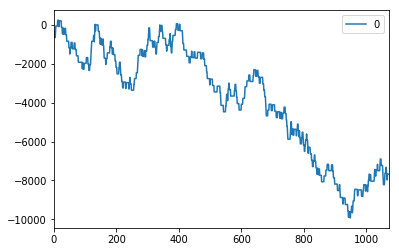

In [62]:
### Betting Only Spread ###

spreadwins = []
spreadlosses = []
push = []
profit = []

for i, n in enumerate(preds):
    ## 87% confidence, 3U bet for spread/ML#######
    if n >= 416 and dogs2019['Cover'][i] == 1:
        spreadwins.append(1)
        profit.append(300)                     # Spread Win

    elif n >= 416 and dogs2019['Cover'][i] == -1:
        profit.append(-330)
        spreadlosses.append(1)
        
    elif n >= 416 and dogs2019['Cover'][i] == 0:
            profit.append(0)
            push.append(1)
            
    ###### 66% confidence, 2U bet#######
    elif n >= 333 and dogs2019['Cover'][i] == 1:
        spreadwins.append(1)
        profit.append(300)                     # Spread Win

    elif n >= 333 and dogs2019['Cover'][i] == -1:
        profit.append(-330)
        spreadlosses.append(1)
        
    elif n >= 333 and dogs2019['Cover'][i] == 0:
            profit.append(0)
            push.append(1)
    
    ####### 50% confidence, 1U bet #######
    elif n >= 333 and dogs2019['Cover'][i] == 1:
        spreadwins.append(1)
        profit.append(300)                     # Spread Win

    elif n >= 333 and dogs2019['Cover'][i] == -1:
        profit.append(-330)
        spreadlosses.append(1)
        
    elif n >= 333 and dogs2019['Cover'][i] == 0:
            profit.append(0)
            push.append(1)
            
    else:
        profit.append(0)
        
profits = sum(profit)
spreadtotal_bet = 100 * (len(spreadwins) + len(spreadlosses)+len(push))
ROI = profits/total_bet
spreadwinpct = len(spreadwins)/(len(spreadwins)+len(spreadlosses))

print('For spread win predictions:')
print('Spread wins:', len(spreadwins), 'Spread losses:', len(spreadlosses), 
      'pushes:', len(push),"win pct:", spreadwinpct, 'profit:', profits, 'total risk:', spreadtotal_bet, 'ROI:', ROI)
print('')
pd.DataFrame(profit).cumsum().plot()